In [2]:
import pandas as pd
import numpy as np
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
import scipy.cluster.hierarchy as sch
from sklearn.cluster import KMeans

In [10]:
wine=pd.read_csv('wine.csv')

In [11]:
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [12]:
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Type             178 non-null    int64  
 1   Alcohol          178 non-null    float64
 2   Malic            178 non-null    float64
 3   Ash              178 non-null    float64
 4   Alcalinity       178 non-null    float64
 5   Magnesium        178 non-null    int64  
 6   Phenols          178 non-null    float64
 7   Flavanoids       178 non-null    float64
 8   Nonflavanoids    178 non-null    float64
 9   Proanthocyanins  178 non-null    float64
 10  Color            178 non-null    float64
 11  Hue              178 non-null    float64
 12  Dilution         178 non-null    float64
 13  Proline          178 non-null    int64  
dtypes: float64(11), int64(3)
memory usage: 19.6 KB


In [13]:
wine.describe()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


## DATA VISUALIZATION

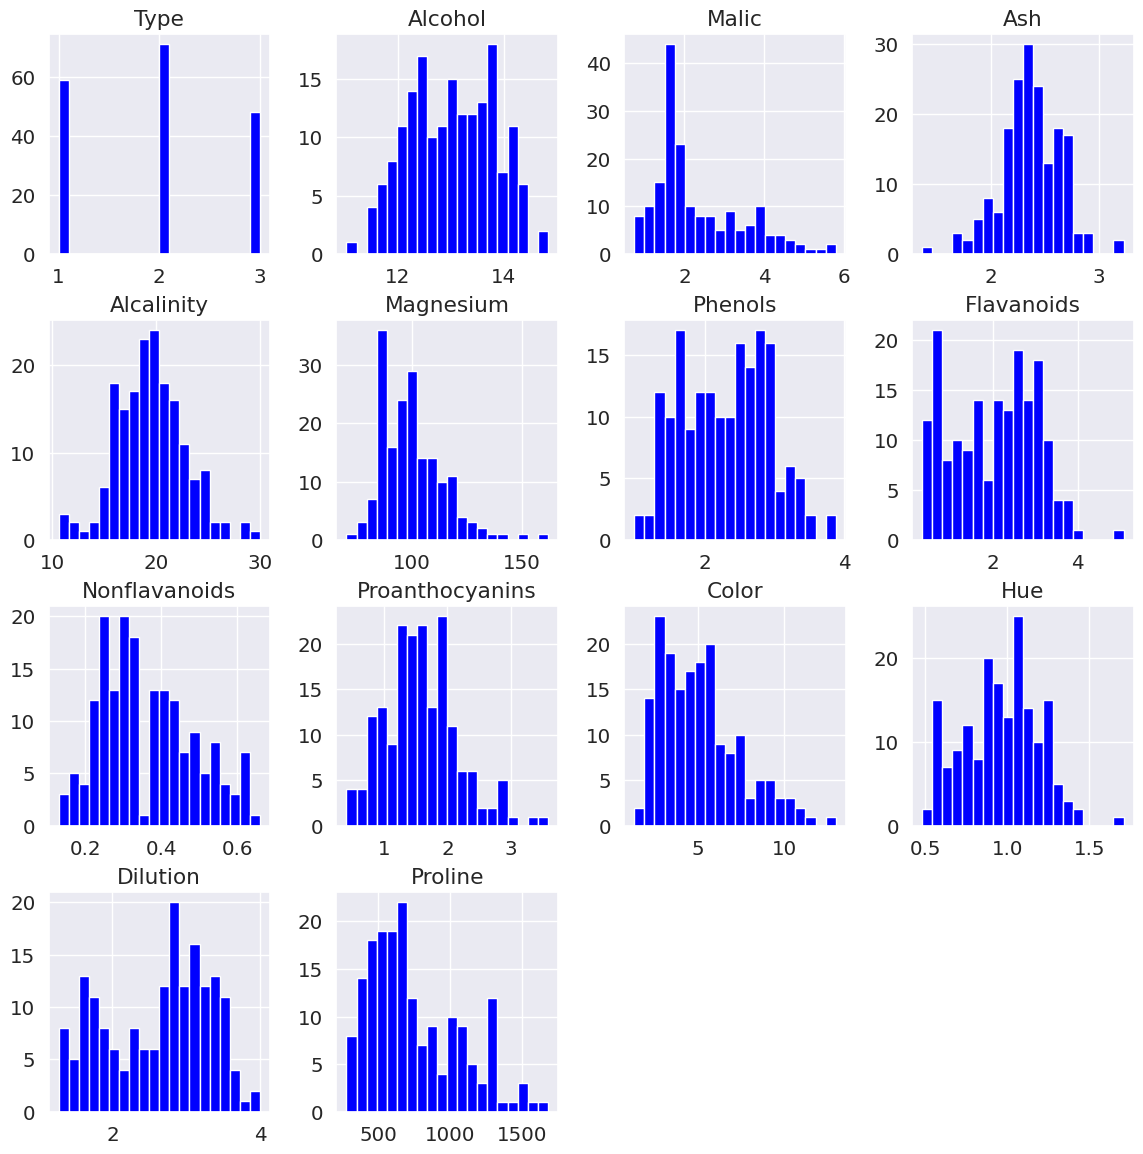

In [14]:
sns.set(style= 'dark', font_scale= 1.3, rc= {'figure.figsize':(14,14)})
ax = wine.hist(bins= 20, color= 'blue')

## NORMALIZATION

In [16]:
wine_new = wine.iloc[:,1:]

In [19]:
scaled_wine = (wine_new - wine_new.min()/wine_new.max()-wine_new.min())

In [18]:
scaled_wine = (wine_new - wine_new.min()/wine_new.max()-wine_new.min())
scaled_wine

,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline
0,2.456237,0.842414,0.648947,4.646667,56.567901,1.567423,2.653071,-0.04697,1.765475,4.261538,0.279298,2.3325,786.834524
1,1.426237,0.912414,0.358947,0.246667,29.567901,1.417423,2.353071,-0.06697,0.755475,3.001538,0.289298,1.8125,771.834524
2,1.386237,1.492414,0.888947,7.646667,30.567901,1.567423,2.833071,-0.02697,2.285475,4.301538,0.269298,1.5825,906.834524
3,2.596237,1.082414,0.718947,5.846667,42.567901,2.617423,3.083071,-0.08697,1.655475,6.421538,0.099298,1.8625,1201.834524
4,1.466237,1.722414,1.088947,10.046667,47.567901,1.567423,2.283071,0.06303,1.295475,2.941538,0.279298,1.3425,456.834524
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,1.936237,4.782414,0.668947,9.546667,24.567901,0.447423,0.203071,0.19303,0.535475,6.321538,-0.120702,0.1525,461.834524
174,1.626237,3.042414,0.698947,12.046667,31.567901,0.567423,0.343071,0.10303,0.885475,5.921538,-0.060702,-0.0275,471.834524
175,1.496237,3.412414,0.478947,9.046667,49.567901,0.357423,0.283071,0.10303,0.825475,8.821538,-0.170702,-0.0275,556.834524
176,1.396237,1.722414,0.588947,9.046667,49.567901,0.417423,0.273071,0.20303,0.935475,7.921538,-0.160702,0.0325,561.834524


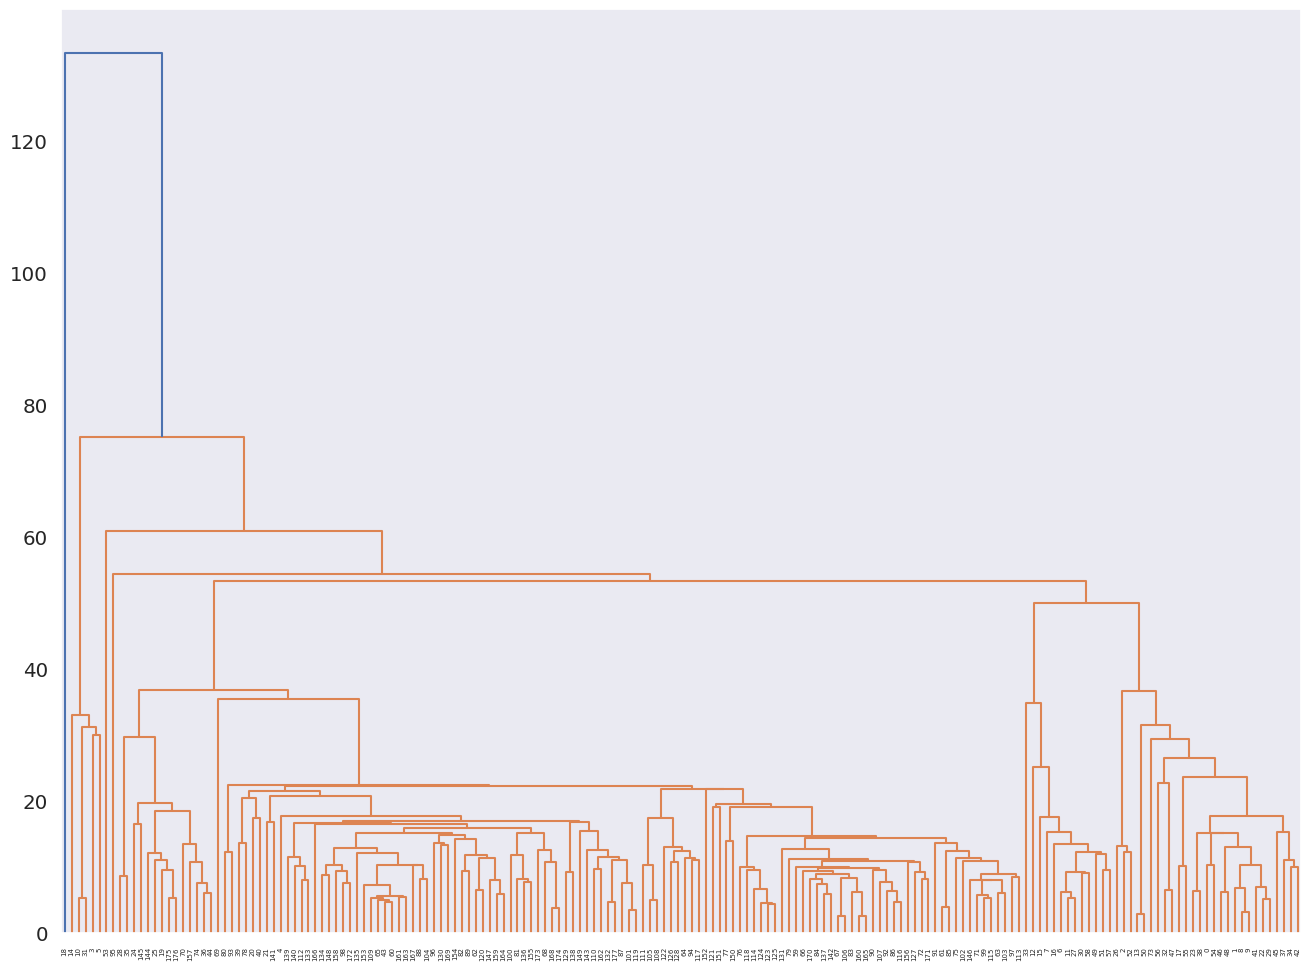

In [20]:
plt.figure(figsize=(16,12))
dendrogram = sch.dendrogram(sch.linkage(scaled_wine,method='single'))

## PCA

In [21]:
pca = PCA()
new_wine = pca.fit_transform(scaled_wine)
new_wine

array([[ 3.18562979e+02,  2.14921307e+01,  3.13073470e+00, ...,
         8.87340044e-02, -3.85475626e-02,  8.02644337e-02],
       [ 3.03097420e+02, -5.36471768e+00,  6.82283550e+00, ...,
         3.97781862e-02, -5.71915771e-02,  1.35927465e-02],
       [ 4.38061133e+02, -6.53730945e+00, -1.11322298e+00, ...,
         2.37770027e-01, -4.87978751e-02, -3.54081623e-02],
       ...,
       [ 8.84580737e+01,  1.87762846e+01, -2.23757651e+00, ...,
        -2.23049341e-01,  9.60485020e-02,  3.61748954e-02],
       [ 9.34562419e+01,  1.86708191e+01, -1.78839152e+00, ...,
        -3.04078323e-02, -5.20893107e-02,  1.32759078e-01],
       [-1.86943190e+02, -2.13330803e-01, -5.63050984e+00, ...,
         1.60725068e-01,  3.19201764e-02,  2.69369989e-02]])

In [22]:
np.round(pca.explained_variance_ratio_,3)

array([0.998, 0.002, 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   ])

## KMEANS CLUSTRING

In [23]:
wcss = []
for i in range(1, 9):
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(new_wine)
    wcss.append(kmeans.inertia_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

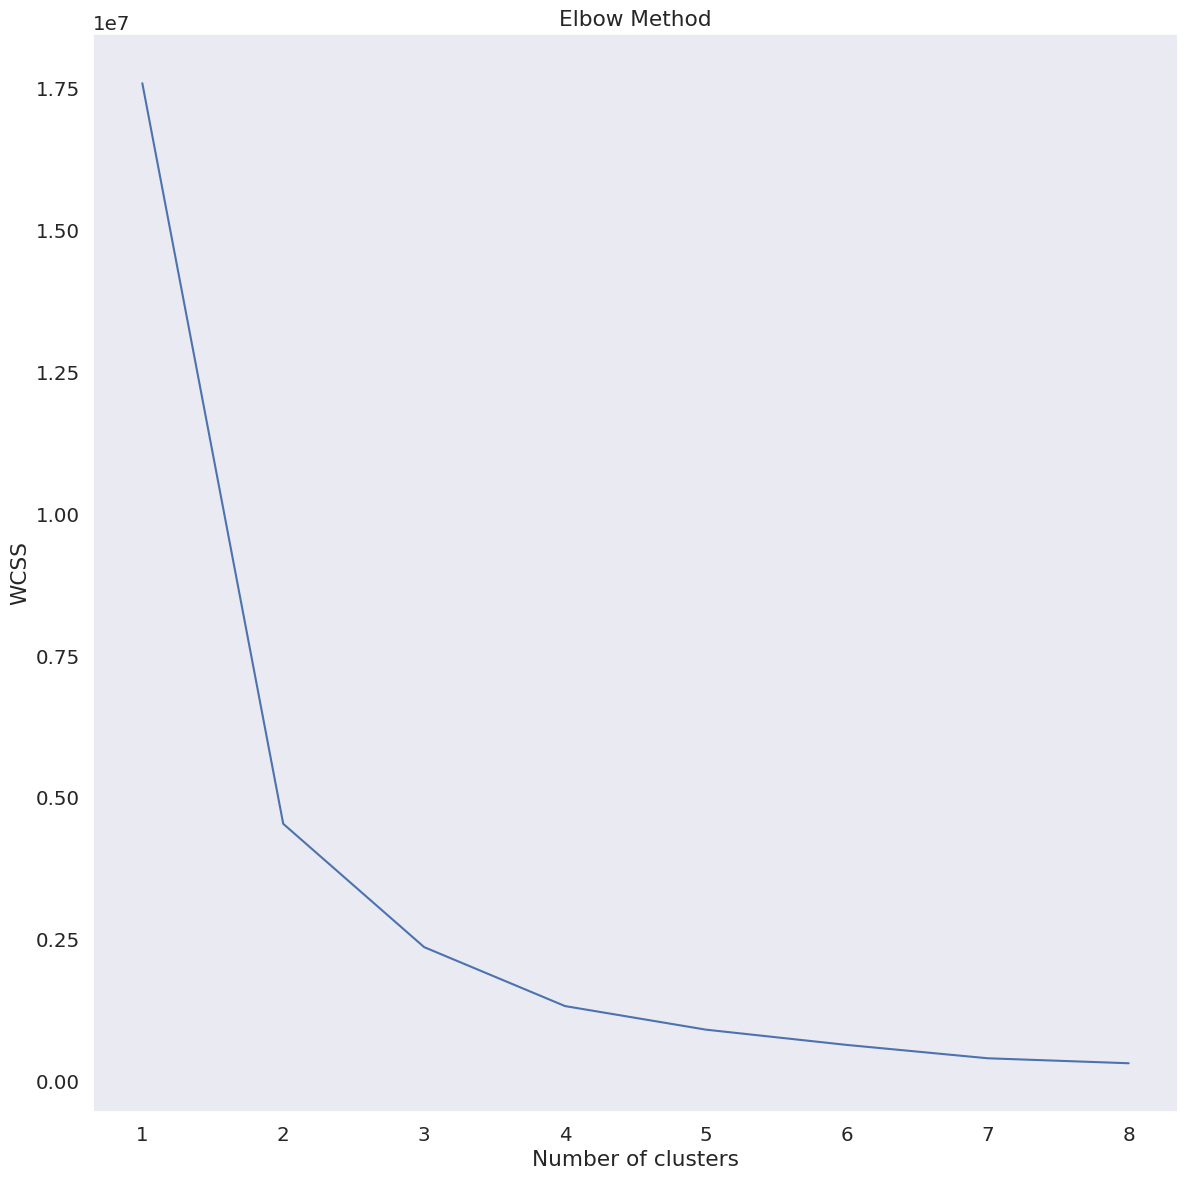

In [24]:
plt.plot(range(1, 9), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

from the above plot we got k = 2

In [25]:
wine_cluster = KMeans(2, random_state=42)
wine_cluster

KMeans(n_clusters=2, random_state=42)

In [26]:
wine_cluster.fit(new_wine)
wine_cluster.labels_

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0], dtype=int32)

In [27]:
wine['clusterid'] = wine_cluster.labels_
wine.head()

,Type,Alcohol,Malic,Ash,Alcalinity,Magnesium,Phenols,Flavanoids,Nonflavanoids,Proanthocyanins,Color,Hue,Dilution,Proline,clusterid
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,0


In [28]:
wine.groupby(['clusterid'])['Alcohol'].apply(lambda x:tuple(x))

clusterid
0    (13.24, 13.64, 14.06, 12.93, 13.5, 13.05, 14.2...
1    (14.23, 13.2, 13.16, 14.37, 14.2, 14.39, 14.06...
Name: Alcohol, dtype: object

In [30]:
clustered_wine = wine.groupby(['clusterid'])['Alcohol'].apply(lambda x: tuple(x)).reset_index()
print(clustered_wine)

   clusterid                                            Alcohol
0          0  (13.24, 13.64, 14.06, 12.93, 13.5, 13.05, 14.2...
1          1  (14.23, 13.2, 13.16, 14.37, 14.2, 14.39, 14.06...
